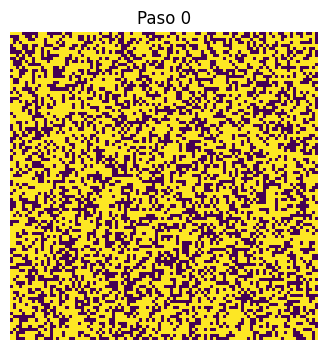

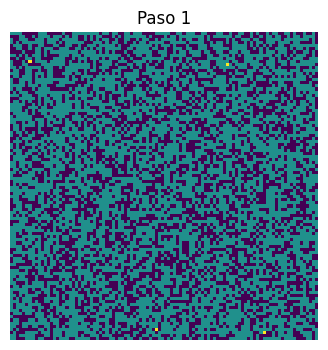

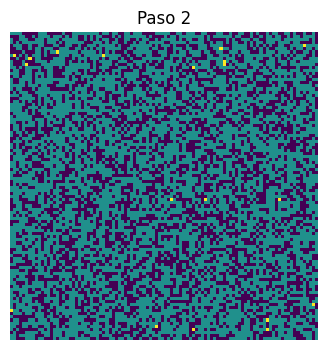

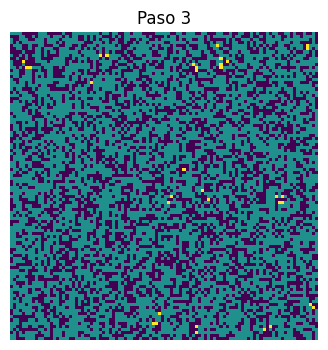

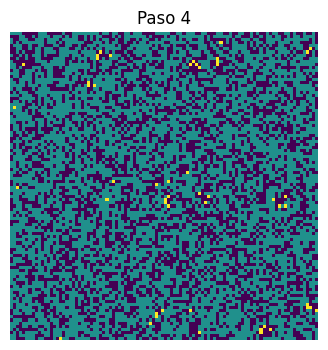

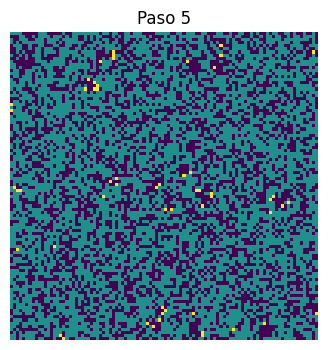

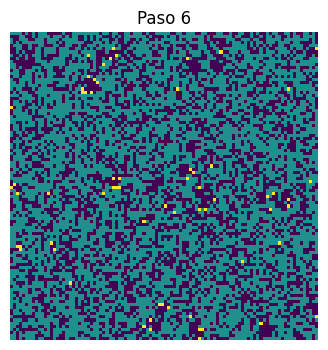

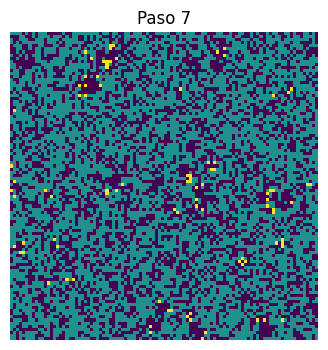

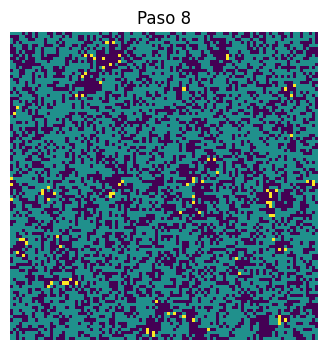

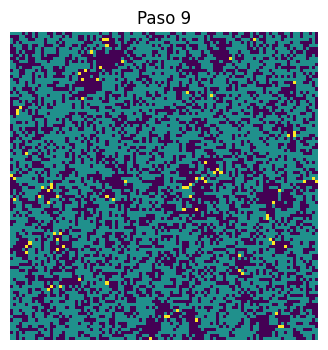

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo creado
size = 100
p_tree = 0.01 #Probabilidad de crecimiento de un arbol en una cuadrícula vacía
p_lightning = 0.001 # probabilidad de ignición espontánea (rayo)
p_spread = 0.4 # probabilidad de propagación del fuego a árbol vecino
tree_density = 0.6
steps = 10  # Se captura hasta este paso

# Funciones del modelo
def initialize_forest(size, tree_density):
    grid = np.zeros((size, size), dtype=int) #Crear arreglos de 0 (size x size)
    grid[np.random.rand(size, size) < tree_density] = 1 #Asignar un arbol
    return grid #Devolver cuadrícula inicial

def step_fire(grid, p_tree, p_lightning, p_spread):
    size = grid.shape[0]
    new_grid = grid.copy()
    for i in range(size):
        for j in range(size):
            state = grid[i, j]
            if state == 0: #Estado en el que no hay arbol (puede crecer arbol)
                if np.random.rand() < p_tree:
                    new_grid[i, j] = 1
            elif state == 1: #Estado con arbol (puede encenderse)
                if np.random.rand() < p_lightning:
                    new_grid[i, j] = 2
                else:
                    neigh = grid[max(i-1,0):i+2, max(j-1,0):j+2]
                    if 2 in neigh and np.random.rand() < p_spread:
                        new_grid[i, j] = 2
            elif state == 2: #Estado con fuego (puede apagarse)
                new_grid[i, j] = 0
    return new_grid

# Simulación y captura de snapshots
grid = initialize_forest(size, tree_density)
snapshots = [grid.copy()]

for t in range(1, steps):
    grid = step_fire(grid, p_tree, p_lightning, p_spread)
    snapshots.append(grid.copy())

# Visualizar cada uno de los primeros 10 pasos
for idx, snap in enumerate(snapshots):
    plt.figure(figsize=(4,4))
    plt.imshow(snap, interpolation='nearest')
    plt.title(f"Paso {idx}")
    plt.axis('off')

plt.show()
